# Data Programming Project: Defining top historical movie directors and years with best movies

## 1. Research description

The purpose of this project is to detect the best movies directors in history and the years in which the best movies have been produced.

More precisely, we will find out which are the top 10 directors with highest average rating in IMDB and the 10 years with highest average rating historically.

To do so, we will execute web scrapping from "IMDB website. In particular we will retrieve the top 250 movies from IMDB international ranking.

To do so, we will utilize the following libraries in Jupyter Notebook:

 - Pandas: to create a dataframe
 - Requests: to send the request to the URL
 - BeautifulSoup: to get the content in the form of HTML
 - Nunpy: to compute algebra calculations

## 2. Web scraping steps

In this section, the web scraping code is displayed and structured into the key steps.

### a. Import the necessary libraries for the project:

In [142]:
import pandas as pd   #pandas will be used to create dataframe
import requests       #requests will be used to send the request to the URL
from bs4 import BeautifulSoup #BeautifulSoup will be used to get the content in the form of HTML
import numpy as np  # nunpy will be used to compute algebra calculations

### b. Define the URL to be used by the libraries 'requests' and 'BautifulSoup':

In [143]:
url = 'https://www.imdb.com/search/title/?count=250&groups=top_1000&sort=user_rating'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

### c. Create the empty lists which will be used to append the retrieved values

In [144]:
movie_name = []
year = []
time = []
rating = []
metascore = []
votes = []
gross = []
description = []
Director = []
Stars = []

### d. Store meaningfull data

In [145]:
movie_data = soup.findAll('div', attrs= {'class': 'lister-item mode-advanced'})

### e. For loop calling data one by one

In [146]:
for store in movie_data:
    name = store.h3.a.text
    movie_name.append(name)
    
    year_of_release = store.h3.find('span', class_ = 'lister-item-year text-muted unbold').text.replace('(', '').replace(')', '')
    year.append(year_of_release)
    
    runtime = store.p.find('span', class_ = 'runtime').text.replace(' min', '')
    time.append(runtime)
    
    rate = store.find('div', class_ = 'inline-block ratings-imdb-rating').text.replace('\n', '')
    rating.append(rate)
    
    meta  = store.find('span', class_ = 'metascore').text.replace(' ', '') if store.find('span', class_ = 'metascore') else '^^^^^^'
    metascore.append(meta)
    #since, gross and votes have same attributes, that's why I had created a common variable and then used indexing
    value = store.find_all('span', attrs = {'name': 'nv'})
    
    vote = value[0].text
    votes.append(vote)
    
    grosses = value[1].text if len(value) >1 else '*****'
    gross.append(grosses)
    
    # Description of the Movies
    describe = store.find_all('p', class_ = 'text-muted')
    description_ = describe[1].text.replace('\n', '') if len(describe) >1 else '*****'
    description.append(description_)
    
    #Cast Details 
    cast = store.find("p", class_ = '')
    cast = cast.text.replace('\n', '').split('|')
    cast = [x.strip() for x in cast]
    cast = [cast[i].replace(j, "") for i,j in enumerate(["Director:", "Stars:"])]
    Director.append(cast[0])
    Stars.append([x.strip() for x in cast[1].split(",")])

### f. Creation of dataframe

In [147]:
movie_DF = pd.DataFrame({'Name of movie': movie_name, 'Year of release': year, 'Watchtime': time, 'Movie Rating': rating, 'Metascore': metascore, 'Votes': votes, 'Gross collection': gross, 'Description': description, "Director": Director, 'Star': Stars})

### g. Definition of data types within dataframe

In [148]:
movie_DF['Year of release'] = pd.to_numeric(movie_DF['Year of release'], errors='coerce')
movie_DF['Watchtime'] = pd.to_numeric(movie_DF['Watchtime'], errors='coerce')
movie_DF['Movie Rating'] = pd.to_numeric(movie_DF['Movie Rating'], errors='coerce')
movie_DF['Metascore'] = pd.to_numeric(movie_DF['Metascore'], errors='coerce')

# 3. Check and review of dataset

Once we have retrieved the data, we proceed to analyze the content and quality of the extraction. This key is essential to make sure that the later analysis will be relevant.

First, the table below summarized the columns retrieved and the data type defined. In total there are a total of 10 columns, out of which 6 are set as object type and 4 as float number type.

In [149]:
print(movie_DF.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name of movie     250 non-null    object 
 1   Year of release   241 non-null    float64
 2   Watchtime         250 non-null    int64  
 3   Movie Rating      250 non-null    float64
 4   Metascore         194 non-null    float64
 5   Votes             250 non-null    object 
 6   Gross collection  250 non-null    object 
 7   Description       250 non-null    object 
 8   Director          250 non-null    object 
 9   Star              250 non-null    object 
dtypes: float64(3), int64(1), object(6)
memory usage: 19.7+ KB
None


Second, we extract the top 10 rows of the table. We see that all columns have been properly filled.

In [153]:
movie_DF.head(10)

,Name of movie,Year of release,Watchtime,Movie Rating,Metascore,Votes,Gross collection,Description,Director,Star
0,Cadena perpetua,1994.0,142,9.3,81.0,"2,602,128",$28.34M,Two imprisoned men bond over a number of years...,Frank Darabont,"[Tim Robbins, Morgan Freeman, Bob Gunton, Will..."
1,El padrino,1972.0,175,9.2,100.0,"1,797,586",$134.97M,The aging patriarch of an organized crime dyna...,Francis Ford Coppola,"[Marlon Brando, Al Pacino, James Caan, Diane K..."
2,El caballero oscuro,2008.0,152,9.0,84.0,"2,573,559",$534.86M,When the menace known as the Joker wreaks havo...,Christopher Nolan,"[Christian Bale, Heath Ledger, Aaron Eckhart, ..."
3,El señor de los anillos: El retorno del rey,2003.0,201,9.0,94.0,"1,787,008",$377.85M,Gandalf and Aragorn lead the World of Men agai...,Peter Jackson,"[Elijah Wood, Viggo Mortensen, Ian McKellen, O..."
4,La lista de Schindler,1993.0,195,9.0,94.0,"1,323,259",$96.90M,"In German-occupied Poland during World War II,...",Steven Spielberg,"[Liam Neeson, Ralph Fiennes, Ben Kingsley, Car..."
5,El padrino: Parte II,1974.0,202,9.0,90.0,"1,238,425",$57.30M,The early life and career of Vito Corleone in ...,Francis Ford Coppola,"[Al Pacino, Robert De Niro, Robert Duvall, Dia..."
6,12 hombres sin piedad,1957.0,96,9.0,96.0,"768,761",$4.36M,The jury in a New York City murder trial is fr...,Sidney Lumet,"[Henry Fonda, Lee J. Cobb, Martin Balsam, John..."
7,Jai Bhim,2021.0,164,8.9,NaN,"191,152",#246,When a tribal man is arrested for a case of al...,T.J. Gnanavel,"[Suriya, Lijo Mol Jose, Manikandan K., Rajisha..."
8,Pulp Fiction,1994.0,154,8.9,94.0,"1,994,582",$107.93M,"The lives of two mob hitmen, a boxer, a gangst...",Quentin Tarantino,"[John Travolta, Uma Thurman, Samuel L. Jackson..."
9,Origen,2010.0,148,8.8,74.0,"2,283,229",$292.58M,A thief who steals corporate secrets through t...,Christopher Nolan,"[Leonardo DiCaprio, Joseph Gordon-Levitt, Elli..."


Third, we do a basic statistical description of columns with value type:
 - Movies were produced between 1921 and 2022.
 - Average Watchtime per movie is 133.6 minutes, with a max of 321 minutes and a min of 45 minutes.
 - Average IMDB movie rating is 8.3 while the rating of the best movie considered is 9.3 and the worst one is 8.1.
 - Average Metascore movie rating is 82.1 while the rating of the best movie considered is 100 and the worst one is 55.

In [151]:
movie_DF.describe().round(1)

,Year of release,Watchtime,Movie Rating,Metascore
count,241.0,250.0,250.0,194.0
mean,1992.3,133.6,8.3,82.1
std,25.6,30.9,0.2,11.4
min,1921.0,45.0,8.1,55.0
25%,1976.0,115.0,8.2,74.0
50%,2001.0,130.0,8.3,84.0
75%,2012.0,151.0,8.4,91.0
max,2022.0,321.0,9.3,100.0


# 3. Analysis results

In this section the main conclusions of the analysis performed are summarized.

## a. Analysis on top directors

Considering all elements in the table, the top 10 directors sorted by average IMDB rating are the following ones:

In [178]:
movie_DF.groupby('Director')[['Movie Rating']].mean().round(1).sort_values(by='Movie Rating',ascending=0).head(10)

,Movie Rating
Director,
Sidney Lumet,9.0
Frank Darabont,9.0
Peter Jackson,8.9
Francis Ford Coppola,8.9
T.J. Gnanavel,8.9
Irvin Kershner,8.7
"Directors:Lana Wachowski, Lilly Wachowski",8.7
Sudha Kongara,8.7
Frank Capra,8.6


## b. Analysis on years with highest average rating

Considering all elements in the table, the top 10 years sorted by average IMDB rating are the following ones:

In [179]:
movie_DF.groupby('Year of release')[['Movie Rating']].mean().round(1).sort_values(by='Movie Rating',ascending=0).head(10)

,Movie Rating
Year of release,
1972.0,9.2
1994.0,8.8
1966.0,8.8
1990.0,8.7
1946.0,8.6
1991.0,8.6
1993.0,8.6
1977.0,8.6
2002.0,8.6


## c. Visual representation of ratings evolution per year

In the visual below it is included the IMDB rating of the movies produced by year. We see that based on IMDB ratings, movie's quality has remained quite stable along time and we can se clear outlayers in 1994 and 1972 which are the two top rated movies.

Also, we can see that the number of movies produced has increased along the years but, in the last decade, we observe the movies with the worst rating within the ranking.

<AxesSubplot:xlabel='Year of release', ylabel='Movie Rating'>

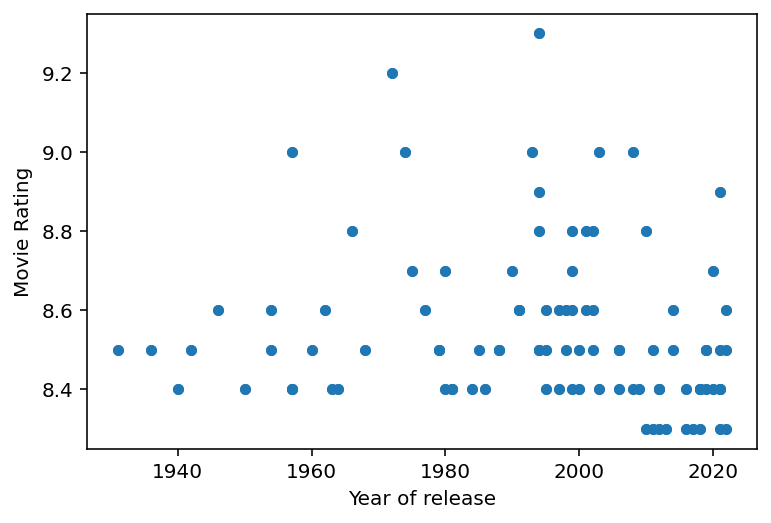

In [116]:
movie_DF.plot(kind='scatter',x='Year of release',y='Movie Rating')

In the visual below it is included the Metascore rating of the movies produced by year. 

In this case we observe that the two trends previously mentioned, more movies in the last years but many of them with worse rating, is even more sharp than in the case of IMDB rating.

<AxesSubplot:xlabel='Year of release', ylabel='Metascore'>

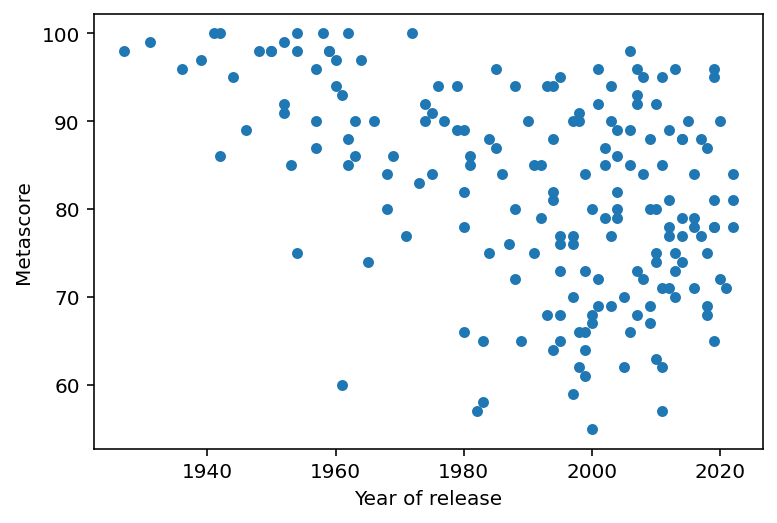

In [183]:
movie_DF.plot(kind='scatter',x='Year of release',y='Metascore')

# 4. Ethical considerations

In this project we have web scraped information from IMDB website. Considering IMDB Conditions of Use, the following is mentioned:

"Robots and Screen Scraping: You may not use data mining, robots, screen scraping, or similar data gathering and extraction tools on this site, except with our express written consent as noted below."

Due to time limitation, I could not get explicit written consent from IMDB. Nevetheless, I have also considered the following:

 - The execution of the code does not generate a significant impact for IMDB servers.
 - The data used is limited to the subsets of information that IMDB provides to users for personal use as plain text extractions.
 
 
 Therefore, regardless written consent is not available, the usage of the information in the scope of the project is ethically and technically correct.

